In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-delhi-climate/DailyDelhiClimate.csv
/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/daily-delhi-climate")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/daily-delhi-climate


# 🚀 Deep Learning Optimizers – End to End with Math

Optimizers are algorithms used to **update the weights** of a neural network in order to minimize the loss function.

---

## 1. **Gradient Descent (GD)**

- Update rule:  
  $$
  \theta = \theta - \eta \cdot \nabla_\theta J(\theta)
  $$

- Where:  
  - $\theta$: model parameters (weights & biases)  
  - $\eta$: learning rate  
  - $\nabla_\theta J(\theta)$: gradient of loss w.r.t. parameters  

### 🔹 Types:
1. **Batch Gradient Descent** → Uses full dataset (slow, memory heavy).  
2. **Stochastic Gradient Descent (SGD)** → Uses one sample (fast, noisy).  
3. **Mini-Batch Gradient Descent** → Uses small batch (balance of both).

---

## 2. **Momentum**

- Idea: Accelerates gradients in consistent directions, dampens oscillations.  

- Update rules:  
  $$
  v_t = \beta v_{t-1} + (1 - \beta) \nabla_\theta J(\theta)
  $$
  $$
  \theta = \theta - \eta v_t
  $$

- Where:  
  - $v_t$: velocity term (exponentially decaying avg. of past gradients)  
  - $\beta$: momentum coefficient (commonly 0.9)  

✅ Helps escape local minima and improves convergence.

---

## 3. **Nesterov Accelerated Gradient (NAG)**

- Looks ahead before making an update.  

- Update rules:  
  $$
  v_t = \beta v_{t-1} + \eta \nabla_\theta J(\theta - \beta v_{t-1})
  $$
  $$
  \theta = \theta - v_t
  $$

✅ More accurate than Momentum, prevents overshooting.

---

## 4. **Adagrad**

- Adapts learning rate per parameter (useful for sparse data).  

- Update rules:  
  $$
  g_t = \nabla_\theta J(\theta)
  $$
  $$
  G_t = G_{t-1} + g_t^2
  $$
  $$
  \theta = \theta - \frac{\eta}{\sqrt{G_t + \epsilon}} g_t
  $$

✅ Large updates for infrequent features, small updates for frequent ones.  
❌ Learning rate decreases too much over time → slows down.

---

## 5. **RMSProp**

- Fixes Adagrad’s problem by using **exponential moving average**.  

- Update rules:  
  $$
  E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2
  $$
  $$
  \theta = \theta - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t
  $$

✅ Keeps learning rate stable, widely used in RNNs.

---

## 6. **Adam (Adaptive Moment Estimation)**

- Combines **Momentum + RMSProp**.  
- Most widely used optimizer.

- Update rules:  
  - First moment estimate (mean of gradients):  
    $$
    m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
    $$
  - Second moment estimate (uncentered variance):  
    $$
    v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
    $$
  - Bias correction:  
    $$
    \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad 
    \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
    $$
  - Update rule:  
    $$
    \theta = \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
    $$

✅ Fast convergence, adaptive LR, works well in most scenarios.  
❌ Can sometimes generalize worse than SGD.

---

## 7. **AdamW (Adam with Weight Decay)**

- Fixes Adam’s poor generalization by **decoupling weight decay**.  
- Update rule:  
  $$
  \theta = \theta - \eta \Big( \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} + \lambda \theta \Big)
  $$

✅ Preferred in modern deep learning (e.g., Transformers, CNNs).

---

## 8. **Other Variants**
- **Nadam** → Adam + Nesterov momentum.  
- **AdaMax** → Adam but uses infinity norm instead of L2.  
- **LAMB** → Scales layer-wise learning rates (used in BERT training).  

---

# 🔥 Summary Table

| Optimizer | Key Idea | Pros | Cons |
|-----------|----------|------|------|
| SGD | Fixed LR, simple | Stable, good generalization | Slow convergence |
| Momentum | Adds velocity | Faster, smoother updates | Can overshoot |
| NAG | Look-ahead gradient | More accurate | Slightly more computation |
| Adagrad | Adaptive LR | Good for sparse data | LR decays too much |
| RMSProp | Moving avg of squared grad | Good for RNNs | Hyperparam tuning |
| Adam | Momentum + RMSProp | Fast, widely used | Poor generalization sometimes |
| AdamW | Adam + weight decay | Better generalization | Still heavy tuning |

---

# ✅ Key Takeaways
- **Start with Adam** for most tasks.  
- **Use SGD + Momentum** if you care about **generalization** (e.g., CV tasks).  
- **Use AdamW** in large-scale deep learning (Transformers, modern DL).  


# Exponentially Wieghted Moving Average

# if we have to find the trends and all and graph of the data then we use this like in time series forecasing,financial and in deep leanring and we can also use this in optimizers


## Exponentially Weighted Moving Average (EWMA)

### 🔹 What is EWMA?
The **Exponentially Weighted Moving Average (EWMA)** is a type of moving average where **recent observations are given more weight** compared to older observations.  
This is different from the **Simple Moving Average (SMA)** where all points in the window are weighted equally.

It is widely used in **time series analysis**, **finance (stock trends)**, and **quality control** because it reacts faster to recent changes in data.

---

### 🔹 Formula
The EWMA at time `t` is defined as:

$$
y_t = \alpha x_t + (1 - \alpha) y_{t-1}
$$

Where:

- $y_t$ = EWMA value at time $t$  
- $x_t$ = actual observation at time $t$  
- $y_{t-1}$ = EWMA value at previous time step  
- $\alpha$ = smoothing factor $(0 < \alpha \leq 1)$  

---

### 🔹 Intuition
- The **smoothing factor $\alpha$** controls how quickly older data decays:
  - **$\alpha$ close to 1** → More weight on recent data (very reactive to changes).  
  - **$\alpha$ close to 0** → More weight on older data (smoother, less reactive).  
- Each observation gets a weight that decreases **exponentially** with time.

Example of weights with $\alpha = 0.3$:
- Most recent point → weight = $0.3$  
- One step before → weight = $0.3 \times (1 - 0.3) = 0.21$  
- Two steps before → weight = $0.3 \times (1 - 0.3)^2 = 0.147$  
- … and so on.

So older data never *fully disappears* but its effect reduces exponentially.

---

### 🔹 Applications
1. **Finance** → Track trends in stock prices.  
2. **Forecasting** → Smooth noisy time series.  
3. **Control Systems / Quality** → Detect shifts in processes.  
4. **Machine Learning** → Feature engineering for sequential data.  

---

### 🔹 Implementation in Pandas
```python
import pandas as pd

# Example data
data = [10, 12, 13, 12, 15, 18, 20]
series = pd.Series(data)

# Compute EWMA with alpha=0.3
ewma = series.ewm(alpha=0.3, adjust=False).mean()
print(ewma)



```



---

✅ This version will render formulas properly inside Jupyter Notebook Markdown.  

Do you also want me to add a **compact inline version** of the recursive expansion like:  
$$y_t = \alpha x_t + \alpha(1-\alpha)x_{t-1} + \alpha(1-\alpha)^2x_{t-2} + \dots$$  
so it’s extra clear how EWMA keeps past data?


# It menans it is moody person if the low beta then it is moody guy but whne we have high beta values that means it is going to be stable

# SO you can also imagine the lower beta are more like younger siblings highliy reactive and more mischevious and uncontrollable while the higer beta is more calm like elder sibbling with more sense and compose personality

🔹 Beta (β) Intuition with Overfitting/Underfitting

High β (close to 1)

Heavily relies on the past (memory).

Reacts slowly to new changes.

Tends to underfit → ignores short-term fluctuations.

👉 Like the elder sibling: calm, composed, steady, doesn’t get swayed by every small thing.

Low β (close to 0)

Focuses more on new values.

Reacts quickly to changes.

Tends to overfit → chases every little wiggle (even noise).

👉 Like the younger sibling: energetic, reactive, “naughty as hell”, changes mood fast.

✅ Big Picture

High β = Underfitting risk → too smooth, ignores new patterns.

Low β = Overfitting risk → too reactive, follows noise as if it’s real signal.

Balanced β (like 0.5–0.7 in many time series) → good trade-off between smoothness and adaptability.

So your analogy is 🔥:
👉 Elder sibling (β ↑) → composed, smooth, ignores little noise = underfit.
👉 Younger sibling (β ↓) → reacts to every small thing = overfit.

In [3]:
import pandas as pd
import plotly.graph_objects as go

# Example noisy time series
data = [10, 12, 13, 12, 15, 18, 20, 19, 21, 25, 23, 22, 24, 27, 26]
series = pd.Series(data)

# Compute EWMA with different beta values
ewma_02 = series.ewm(alpha=1-0.2, adjust=False).mean()  # beta=0.2 → alpha=0.8
ewma_05 = series.ewm(alpha=1-0.5, adjust=False).mean()  # beta=0.5 → alpha=0.5
ewma_09 = series.ewm(alpha=1-0.9, adjust=False).mean()  # beta=0.9 → alpha=0.1

# Create Plotly figure
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(
    x=series.index, y=series,
    mode='lines+markers',
    name='Original Data',
    line=dict(width=2, color='black'),
    marker=dict(size=8, symbol='circle')
))

# EWMA β=0.2
fig.add_trace(go.Scatter(
    x=series.index, y=ewma_02,
    mode='lines+markers',
    name='EWMA (β=0.2, fast reaction)',
    line=dict(width=2, color='red'),
    marker=dict(size=6, symbol='triangle-up')
))

# EWMA β=0.5
fig.add_trace(go.Scatter(
    x=series.index, y=ewma_05,
    mode='lines+markers',
    name='EWMA (β=0.5, balanced)',
    line=dict(width=2, color='blue'),
    marker=dict(size=6, symbol='square')
))

# EWMA β=0.9
fig.add_trace(go.Scatter(
    x=series.index, y=ewma_09,
    mode='lines+markers',
    name='EWMA (β=0.9, smooth trend)',
    line=dict(width=2, color='green'),
    marker=dict(size=6, symbol='diamond')
))

# Layout customization
fig.update_layout(
    title="Effect of Different β Values in EWMA (Interactive)",
    xaxis_title="Time",
    yaxis_title="Value",
    template="plotly_white",
    legend=dict(title="Legend", x=0.02, y=0.98),
    hovermode="x unified"
)

fig.show()


In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Generate some noisy data (like stock prices)
np.random.seed(42)
n = 40
time = np.arange(n)
data = np.sin(time/3) + np.random.normal(scale=0.3, size=n)

# Convert to pandas Series
series = pd.Series(data)

# Different beta values to compare
betas = [0.1, 0.3, 0.7, 0.9]

# Initialize Plotly figure
fig = go.Figure()

# Plot original data
fig.add_trace(go.Scatter(
    x=time, y=series,
    mode='markers+lines',
    name="Original Data (Noisy)",
    line=dict(color="black", dash="dot"),
    marker=dict(size=8, color="black")
))

# Add EWMA lines for different betas
colors = ["blue", "green", "orange", "red"]
for beta, col in zip(betas, colors):
    ewma = series.ewm(alpha=(1-beta)).mean()
    fig.add_trace(go.Scatter(
        x=time, y=ewma,
        mode="lines+markers",
        name=f"EWMA (β={beta})",
        line=dict(width=3, color=col),
        marker=dict(size=6, symbol="circle", color=col)
    ))

# Update layout for liveliness
fig.update_layout(
    title="EWMA Smoothing: Elder vs Younger Sibling Analogy 🎭",
    xaxis_title="Time",
    yaxis_title="Value",
    template="plotly_dark",
    legend=dict(
        title="Legend",
        bgcolor="rgba(0,0,0,0.3)",
        bordercolor="white",
        borderwidth=1
    ),
    annotations=[
        dict(
            x=5, y=series[5],
            text="Younger sibling (β low) = Reacts fast 🤸",
            showarrow=True, arrowhead=2, ax=-60, ay=-80,
            font=dict(color="cyan")
        ),
        dict(
            x=25, y=series[25],
            text="Elder sibling (β high) = Calm & steady 😎",
            showarrow=True, arrowhead=2, ax=50, ay=-60,
            font=dict(color="orange")
        )
    ]
)

fig.show()


##Black dotted line → Original noisy data.

#Blue/Green lines (β=0.1,0.3) → Younger sibling: reacts quickly, more jumpy (overfits noise).

#Orange/Red lines (β=0.7,0.9) → Elder sibling: calm, steady, ignores small changes (underfits sudden changes).

In [5]:
import pandas as pd
df=pd.read_csv("/kaggle/input/daily-delhi-climate/DailyDelhiClimate.csv")

In [6]:
new_df=df[['date','meantemp']]
new_df

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1571,2017-04-20,34.500000
1572,2017-04-21,34.250000
1573,2017-04-22,32.900000
1574,2017-04-23,32.875000


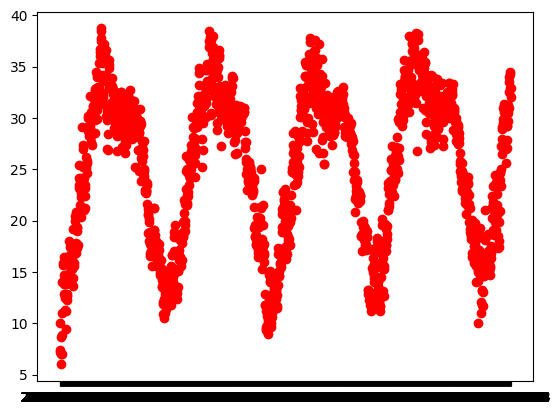

In [7]:
import matplotlib.pyplot as plt 
plt.scatter(new_df['date'],df['meantemp'],color='red')

In [8]:

x1=new_df['meantemp'].ewm(alpha=0.9).mean()

In [9]:
x1

0       10.000000
1        7.636364
2        7.213213
3        8.521452
4        6.252123
          ...    
1571    34.403401
1572    34.265340
1573    33.036534
1574    32.891153
1575    32.089115
Name: meantemp, Length: 1576, dtype: float64

In [10]:
new_df['ewma']=x1

/tmp/ipykernel_13/2104473215.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
new_df

,date,meantemp,ewma
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,7.636364
2,2013-01-03,7.166667,7.213213
3,2013-01-04,8.666667,8.521452
4,2013-01-05,6.000000,6.252123
...,...,...,...
1571,2017-04-20,34.500000,34.403401
1572,2017-04-21,34.250000,34.265340
1573,2017-04-22,32.900000,33.036534
1574,2017-04-23,32.875000,32.891153


# Stochastic Gradient Descent (SGD)

Gradient Descent (GD) is an optimization algorithm used to minimize a loss (cost) function by iteratively updating model parameters.  
However, **Stochastic Gradient Descent (SGD)** is a variation of Gradient Descent that introduces randomness in the process to make learning faster and more efficient.

---

## 🔹 Working of SGD

1. **Traditional Gradient Descent (Batch GD):**
   - Uses the **entire dataset** to compute the gradient of the cost function.
   - Each update step is:

     $$
     \theta = \theta - \eta \cdot \nabla_\theta J(\theta)
     $$

     where:  
     - $ \theta $ = parameters (weights)  
     - $ \eta $ = learning rate  
     - $ J(\theta) $ = cost function  

   - **Problem:** For large datasets, this becomes computationally very expensive and slow.

---

2. **Stochastic Gradient Descent (SGD):**
   - Instead of using the **entire dataset**, SGD updates the parameters using **only one randomly chosen data point (sample)** at each step.
   - Update rule:

     $$
     \theta = \theta - \eta \cdot \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
     $$

     where:  
     - $ (x^{(i)}, y^{(i)}) $ = a single training example  
     - Gradient is calculated **only for that sample**  

   - **Advantage:** Faster updates, allows the model to start converging quickly.  
   - **Disadvantage:** More **noisy updates** (zig-zag path), may not converge smoothly.

---

3. **Mini-Batch Gradient Descent:**
   - A compromise between Batch GD and SGD.  
   - Uses a **small subset (batch)** of training data for each update.  
   - Update rule:

     $$
     \theta = \theta - \eta \cdot \frac{1}{m} \sum_{j=1}^{m} \nabla_\theta J(\theta; x^{(j)}, y^{(j)})
     $$

     where:  
     - $ m $ = batch size  

   - This balances **speed and stability**, making it the most commonly used variant in Deep Learning.

---

## 🔹 Key Intuitions

- **Batch GD**: Slow but stable (good for convex problems).  
- **SGD**: Fast and noisy (may overshoot, but can escape local minima).  
- **Mini-Batch GD**: Best of both worlds (commonly used in practice).

---

## 🔹 Advantages of SGD

- Efficient for large datasets.  
- Helps in escaping local minima due to randomness.  
- Online learning: Can update the model as data arrives in streams.  

---

## 🔹 Disadvantages of SGD

- Noisy updates → may not converge directly.  
- Requires careful tuning of **learning rate ($ \eta $)**.  
- May oscillate around the minimum instead of converging smoothly.  

---

## 🔹 Visualization of Learning Paths

- **Batch GD**: Smooth path straight to minimum.  
- **SGD**: Zig-zag noisy path but reaches the minimum faster.  
- **Mini-Batch GD**: Moderately smooth, efficient convergence.  

---


# KERAS TUNER FOR OPTIMIZER

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [13]:
import pandas as pd 
import numpy as np

In [14]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

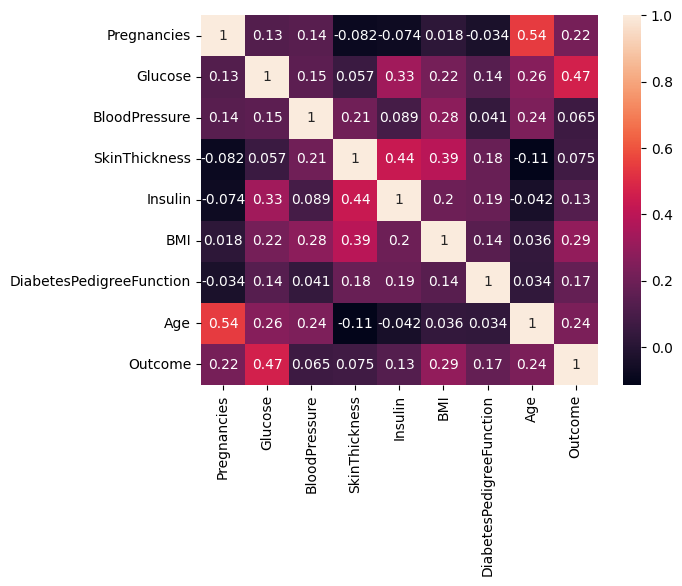

In [16]:
import seaborn as sns 
sns.heatmap(df.corr(),annot=True)

In [17]:
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [20]:
sc=StandardScaler()

In [21]:
X_train_new=sc.fit_transform(X_train)

In [22]:
X_test_new=sc.transform(X_test)

In [23]:
X_train_final=pd.DataFrame(X_train_new,columns=X_train.columns)

In [24]:
X_test_final=pd.DataFrame(X_test_new,columns=X_train.columns)

In [25]:
X_train=X_train_final
X_test=X_test_final

In [26]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-09-03 14:36:38.052446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756910198.331916      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756910198.415253      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
model=Sequential()

In [28]:
model.add(Dense(32,activation="relu",input_dim=8))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

2025-09-03 14:36:54.593460: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [29]:
model.compile(optimizer='adam',metrics=['accuracy'],loss=['binary_crossentropy'])


In [30]:
model.fit(X_train,Y_train,epochs=30,validation_split=0.2,batch_size=32)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6273 - loss: 0.6895 - val_accuracy: 0.6423 - val_loss: 0.6696
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6414 - loss: 0.6554 - val_accuracy: 0.6911 - val_loss: 0.6213
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6838 - loss: 0.6105 - val_accuracy: 0.7154 - val_loss: 0.5851
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6915 - loss: 0.5992 - val_accuracy: 0.7480 - val_loss: 0.5555
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7310 - loss: 0.5688 - val_accuracy: 0.7561 - val_loss: 0.5295
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7569 - loss: 0.5411 - val_accuracy: 0.7805 - val_loss: 0.5107
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7567 - loss: 0.5366 - val_accuracy: 0.8049 - val_loss: 0.4943
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7601 - loss: 0.5286 - val_accuracy: 0.7967 - val_loss

# Keras Tuner

In [31]:
import keras_tuner as kt

In [32]:
# we are going to use this to find the best paramters
def build_model(hp):
    model=Sequential()
    model.add(Dense(32,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer',['adam','sgd','rmsprop','adadelta']),loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [33]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [34]:
tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.3311688303947449

Best val_accuracy So Far: 0.7467532753944397
Total elapsed time: 00h 00m 15s


In [35]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [36]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 



In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X_train,Y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,Y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7460 - loss: 0.5649 - val_accuracy: 0.7273 - val_loss: 0.5434
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7507 - loss: 0.5389 - val_accuracy: 0.7403 - val_loss: 0.5282
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7769 - loss: 0.5020 - val_accuracy: 0.7403 - val_loss: 0.5171
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7886 - loss: 0.4854 - val_accuracy: 0.7403 - val_loss: 0.5098
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7727 - loss: 0.4900 - val_accuracy: 0.7468 - val_loss: 0.5015
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7899 - loss: 0.4682 - val_accuracy: 0.7403 - val_loss: 0.4984
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7874 - loss: 0.4626 - val_accuracy: 0.7338 - val_loss: 0.4963
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7834 - loss: 0.4800 - val_accuracy: 0.72

In [39]:
def build_model(hp):
    model=Sequential()
    units = hp.Int('units', min_value=8, max_value=128, step=8)
    
    model.add(Dense(units=units,activation="relu",input_dim=8))
    model.add(Dense(1,activation='sigmoid'))
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adadelta'])
    
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model


In [40]:

tuner2=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='kaggle_tuner',project_name="Veer")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [41]:
tuner2.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.7402597665786743

Best val_accuracy So Far: 0.7402597665786743
Total elapsed time: 00h 00m 17s
